# Python for Finance

Importing necessary libraries

In [112]:
import datetime as dt 
import pandas as pd 
import pandas_datareader.data as web
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style


Setting  the style for the plots 

In [113]:
style.use('ggplot')

## Acquiring Data

Let's set the dates 

In [114]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

Let's get our data and and add it to the data frame


In [115]:
# df = web.DataReader("TSLA", 'yahoo', start, end)
# df.shape

Convert to CSV

In [116]:
#df.to_csv('Tesla.csv', index )

In [117]:
tesla_data = pd.read_csv('../input/Tesla.csv', parse_dates = True, index_col = 'Date')
tesla_data.shape

(1640, 6)

In [118]:
tesla_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


### Visualising our data
Using pandas itself to create lineplots

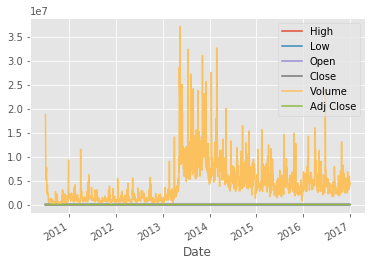

In [119]:
tesla_data.plot()

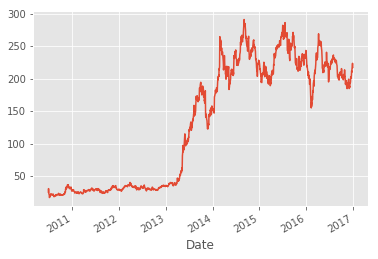

In [120]:
tesla_data['High'].plot()

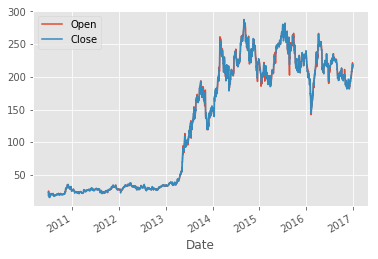

In [121]:
tesla_data[['Open', 'Close']].plot()

## Adding More columns

In [122]:
tesla_data['100ma'] = tesla_data['Adj Close'].rolling(window = 100).mean()

In [123]:
tesla_data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,NaN


We see that the first 100 rows would be missing. To change that, we add a parameter. 

In [124]:
tesla_data['100ma'] = tesla_data['Adj Close'].rolling(window = 100, min_periods = 0).mean()

In [125]:
tesla_data.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


## Subplots and Axes

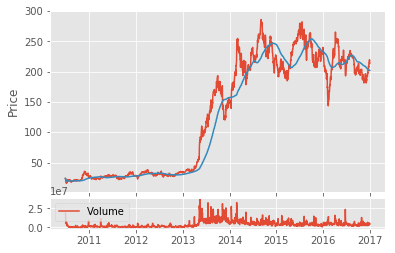

In [144]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

# Plotting the data
ax1.plot(tesla_data.index, tesla_data['Adj Close'], label = "Adj Close")
ax1.plot(tesla_data.index, tesla_data['100ma'], label = "100 Moving Average")
ax2.plot(tesla_data.index, tesla_data['Volume'])

ax1.set_ylabel('Price')
ax1.set_xlabel('Time Period')
plt.legend()

## Manipulating Data for a particular time frame

In [131]:
# We can collect data for every 10 days as an OHLC as well using the OHLC function 
tesla_ohlc = tesla_data['Adj Close'].resample('10D').ohlc()
tesla_ohlc

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000
2010-08-18,18.770000,20.129999,18.770000,19.700001
2010-08-28,19.870001,21.059999,19.480000,21.049999
2010-09-07,20.540001,21.980000,20.170000,20.940001
2010-09-17,20.230000,21.059999,19.559999,20.100000


In [127]:
#Resampling the data
tesla_data_10days  = tesla_data['Adj Close'].resample('10D')
type(tesla_data_10days)

pandas.core.resample.DatetimeIndexResampler

In [128]:
mean_10days = tesla_data_10days.mean()
mean_10days

Date
2010-06-29     19.750000
2010-07-09     18.826666
2010-07-19     20.867500
2010-07-29     20.637143
2010-08-08     18.625714
2010-08-18     19.417500
2010-08-28     20.382000
2010-09-07     20.885000
2010-09-17     20.265000
2010-09-27     20.936250
2010-10-07     20.452857
2010-10-17     20.658571
2010-10-27     22.225000
2010-11-06     27.941667
2010-11-16     31.925714
2010-11-26     33.861667
2010-12-06     30.811250
2010-12-16     31.475000
2010-12-26     26.587143
2011-01-05     27.161250
2011-01-15     23.964000
2011-01-25     24.242500
2011-02-04     23.449999
2011-02-14     23.018572
2011-02-24     23.900000
2011-03-06     24.085714
2011-03-16     22.600000
2011-03-26     25.186666
2011-04-05     25.863750
2011-04-15     25.652000
                 ...    
2016-03-09    216.992498
2016-03-19    230.630002
2016-03-29    243.682505
2016-04-08    251.451668
2016-04-18    251.286251
2016-04-28    230.230000
2016-05-08    207.772858
2016-05-18    218.566250
2016-05-28    220.28

In [129]:
# Sum of 10 days data of volume 
volume_10days = tesla_data['Volume'].resample('10D').sum()
(volume_10days)

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
2010-08-18     4554300
2010-08-28     2350500
2010-09-07     5679200
2010-09-17     5151900
2010-09-27     7684900
2010-10-07     1721700
2010-10-17     2078100
2010-10-27     4897200
2010-11-06    11823700
2010-11-16     8736700
2010-11-26     8185100
2010-12-06     7000100
2010-12-16     5290100
2010-12-26    22606800
2011-01-05    11688700
2011-01-15     9135200
2011-01-25     6915100
2011-02-04     9050200
2011-02-14    15011200
2011-02-24     7442800
2011-03-06     8790900
2011-03-16     5227800
2011-03-26    20028700
2011-04-05    14147600
2011-04-15     4749400
                ...   
2016-03-09    30992500
2016-03-19    23459200
2016-03-29    76008400
2016-04-08    35074400
2016-04-18    32482700
2016-04-28    41281400
2016-05-08    26269800
2016-05-18    40439000
2016-05-28    12259600
2016-06-07    35826300
2016-06-17    52096700
2016-06-27    39751000
2016-0

## Plotting Matplotlib dates and graphs 
Matplotlib needs it's own date library. 
We will aslo need the finance library of matplotlib 
Let's import that. 

In [139]:
import matplotlib.dates as mdates
#from mpl_finance import candlestick_ohlc

Reset to regular indexing and then we will switch to mdates

In [141]:
tesla_ohlc.reset_index(inplace = True)
tesla_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


Switch to Mdates for some non-sensical reason 

In [142]:
tesla_ohlc['Date'] = tesla_ohlc['Date'].map(mdates.date2num)

In [143]:
tesla_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


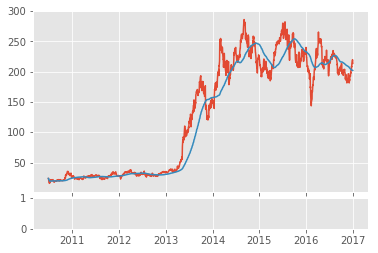

In [145]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

#Plotting the data
ax1.xaxis_date()

candlestick_ohlc(ax1, tesla_ohlc)